<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h1 align="center" style="font-family:Arial;color:#6c6c6c;font-size:30px;">Lab 2: Data Preparation</h1><p>Lets consider the <i>algae</i> dataset again. Remember the kinds of variables that describe the data.
Remember to transform <code>object</code> variables to symbolic ones as seen in the previous lab, and keep the
numeric separated from the symbolic ones, to deal with them with the right tools.</p>

</div>
</div>
</div>


In [1]:
import pandas as pd
import numpy as np
import ds_functions as ds
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
original = pd.read_csv('data/algae.csv', index_col='date', sep=',', decimal='.', parse_dates=True, infer_datetime_format=True)

sb_vars = original.select_dtypes(include='object')
original[sb_vars.columns] = original.select_dtypes(['object']).apply(lambda x: x.astype('category'))

cols_nr = original.select_dtypes(include='number')
cols_sb = original.select_dtypes(include='category')

original.describe(include='all')

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity,river_depth,season
count,199.000000,198.000000,190.000000,198.000000,198.000000,198.000000,198.000000,188.000000,200,200,200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,medium,winter
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,84,62
mean,8.011759,9.117778,43.636842,3.282828,154.447475,83.325909,111.550808,13.541011,NaN,NaN,NaN
std,0.598302,2.391253,46.830993,3.776458,180.011207,116.783165,102.214088,20.448323,NaN,NaN,NaN
min,5.600000,1.500000,0.220000,0.050000,5.000000,1.000000,0.900000,0.000000,NaN,NaN,NaN
25%,7.700000,7.725000,10.985000,1.297500,35.625000,16.000000,19.395000,2.000000,NaN,NaN,NaN
50%,8.060000,9.800000,32.730000,2.675000,99.665000,41.400000,84.500000,5.200000,NaN,NaN,NaN
75%,8.400000,10.800000,57.825000,4.447500,203.730000,102.247500,182.160000,18.300000,NaN,NaN,NaN


<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h2 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Missing Values Imputation</h2><p>Missing values are a kind of a plague in data science, but in particular when using sci-kit learn, since its estimators
are not able to deal with them. A missing value corresponds to a variable without any value for a given record.</p>
<p>In <code>sklearn.impute</code> there are two ways of making missing imputations:</p>
<ul>
<li>through <code>SimpleImputer</code>, which looks at a single variable and replaces every missing value for it,
according to one of the following strategies:<code>mean</code>, <code>median</code>, <code>most_frequent</code>
and <code>constant</code>.</li>
<li>and through <code>IterativeImputer</code>, which considers all the variables to estimate missing values (out of the
scope of this tutorial).</li>
</ul>
<p>The <code>Imputer</code> is created in the first place, defining the strategy to follow, and then it is fitted to
the data (<code>fit</code> method), in order to compute the right values to impute, if required. Then it can be
applied to the data through the <code>transform</code>. Using the <code>fit_transform</code> method, we are able
to apply both in just one call, but we are not able to reuse the imputer to any other dataset.</p>

</div>
</div>
</div>

In [2]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='constant', fill_value='NA', missing_values=np.nan, copy=True)
imp.fit(original.values)
mat = imp.transform(original.values)
data = pd.DataFrame(mat, columns=original.columns)
data.describe(include='all')

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity,river_depth,season
count,200.0,200.0,200,200.00,200.0,200.0,200.0,200,200,200,200
unique,72.0,89.0,179,162.00,179.0,175.0,188.0,131,3,3,4
top,8.3,9.8,NA,1.72,10.0,1.0,6.0,NA,high,medium,winter
freq,14.0,8.0,10,3.00,9.0,5.0,4.0,12,84,84,62


<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>Filling all missing values with <code>'NA'</code>, transforms all the variables into symbolic ones, which is not
desirable at all. But putting a <code>0</code> or a <code>-1</code> changes the variable distribution.
Indeed, usually for numerical variables we use the <code>mean</code> or <code>median</code> strategies, and for
symbolic ones we use either <code>constant</code> or <code>most_frequent</code>.</p>

</div>
</div>
</div>

In [3]:
imp_nr = SimpleImputer(strategy='mean', missing_values=np.nan, copy=True)
imp_sb = SimpleImputer(strategy='most_frequent', missing_values='', copy=True)
df_nr = pd.DataFrame(imp_nr.fit_transform(cols_nr), columns=cols_nr.columns)
df_sb = pd.DataFrame(imp_sb.fit_transform(cols_sb), columns=cols_sb.columns)

data = df_nr.join(df_sb, how='right')
data.describe(include='all')

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity,river_depth,season
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200,200,200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high,medium,winter
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,84,62
mean,8.011759,9.117778,43.636842,3.282828,154.447475,83.325909,111.550808,13.541011,NaN,NaN,NaN
std,0.596797,2.379206,45.639169,3.757432,179.104344,116.194833,101.699153,19.822204,NaN,NaN,NaN
min,5.600000,1.500000,0.220000,0.050000,5.000000,1.000000,0.900000,0.000000,NaN,NaN,NaN
25%,7.700000,7.775000,11.067500,1.312500,36.875000,16.000000,20.185000,2.000000,NaN,NaN,NaN
50%,8.055000,9.800000,36.000000,2.740000,101.125000,43.085000,85.200000,5.550000,NaN,NaN,NaN
75%,8.400000,10.800000,56.977500,4.422500,199.850000,102.082500,179.140000,17.200000,NaN,NaN,NaN


<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h2 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Scaling</h2><p>Scaling transformations may be accomplished using both <code>StandardScaler</code> and <code>MinMaxScaler</code> classes
from the <code>sklearn.preprocessing</code> package. While the Standard Scaler implements the z-score transformation
(<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler">https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler</a>),
the MinMaxScaler normalizes a variable to lie between a given minimum and maximum value, often between 0 and 1
(<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler">https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler</a>).
Be careful, that it can only be applied to numerical data, without any missing value.</p>

</div>
</div>
</div>

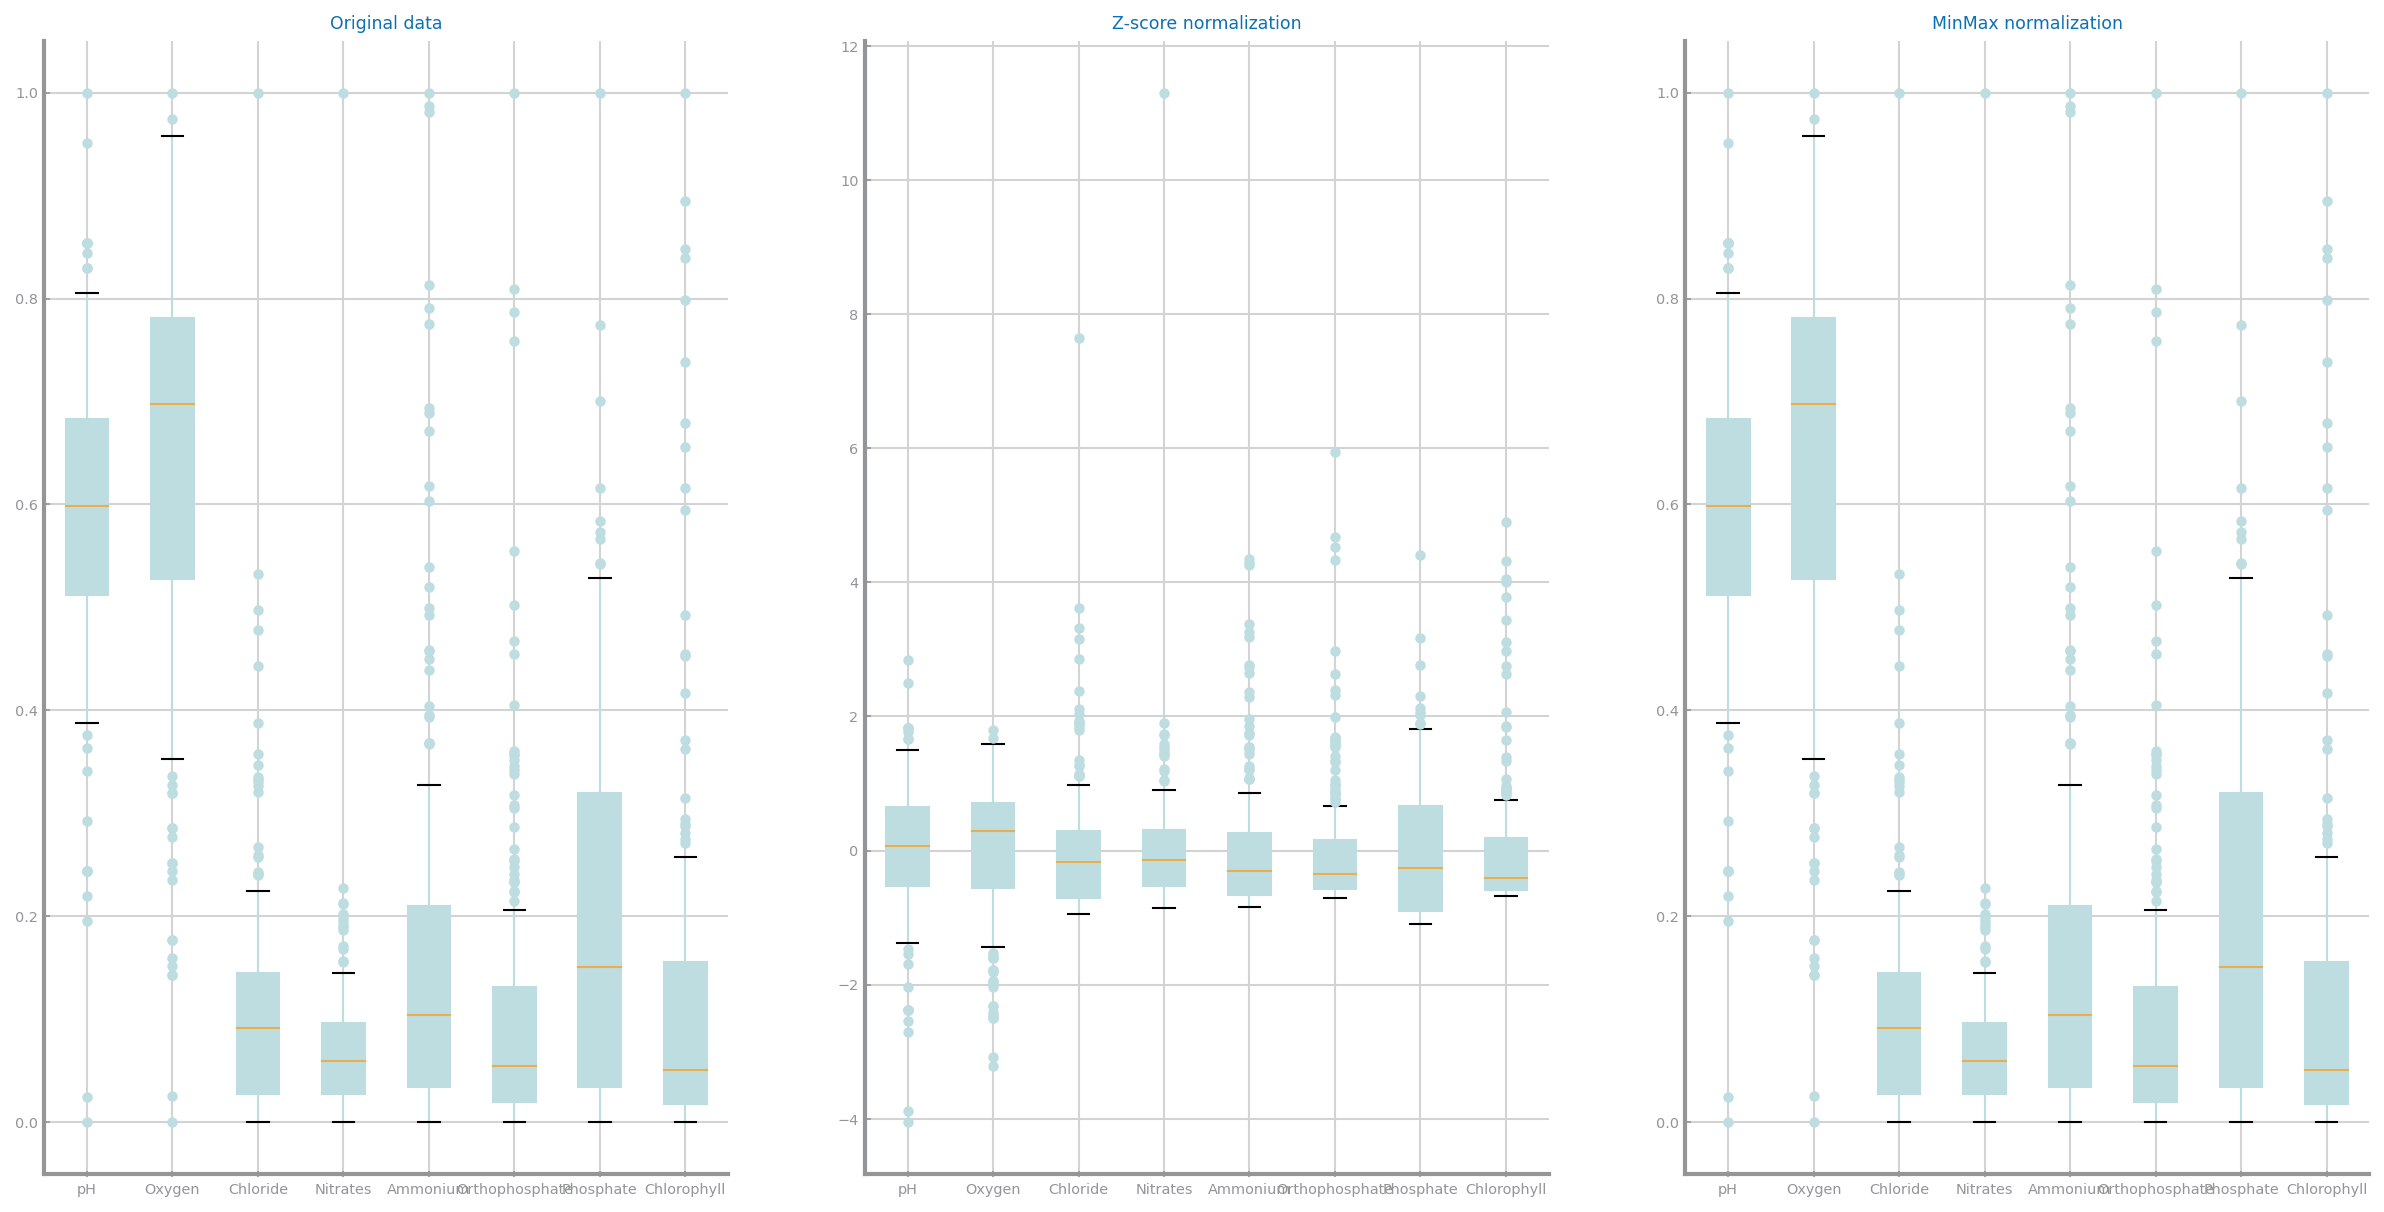

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_zscore = df_nr.join(df_sb, how='right')
norm_data_zscore.describe(include='all')

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
df_nr = pd.DataFrame(transf.transform(df_nr), columns= df_nr.columns)
norm_data_minmax = df_nr.join(df_sb, how='right')
norm_data_minmax.describe(include='all')

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(20,10),squeeze=False)
axs[0, 0].set_title('Original data')
df_nr.boxplot(ax=axs[0, 0])
axs[0, 1].set_title('Z-score normalization')
norm_data_zscore.boxplot(ax=axs[0, 1])
axs[0, 2].set_title('MinMax normalization')
norm_data_minmax.boxplot(ax=axs[0, 2])
#fig.tight_layout()
plt.show()

<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h2 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Variable Dummification</h2><p>Dealing with nominal variables demands additional transformations for some of mining techniques, in particular
the ones depending on similarity measures, where the distance between the distinct values is of major importance.
The easiest transformation of such variables is called <strong>dummification</strong>, and consists on creating a new
variable for each possible value from the original one, removing it from the dataset.
Note, however, that this shouldn't be applied to the class variable, since it will transform a simple <i>multi label</i>
classification problem into a <i>multiclass</i> problem.</p>
<p>We can make use of the <code>OneHotEncoder</code>, in order to apply dummification, from the package
<code>sklearn.preprocessing</code>. The <code>pandas.DataFrame.getDummies</code> is much less interesting since it
isn't able to apply the same encoder to different parts of a dataset, while the first one is.</p>
<p>Be careful with missing values, since dummification only works it there is no missing value on the variables to
dummify.</p>
<p>For example, after dummifying the <i>algae</i> dataframe, we get a new one with 18 variables, instead of the 11
original ones, since each one of the three symbolic variables had three different values.</p>

In [5]:
from sklearn.preprocessing import OneHotEncoder

def dummify(df, cols_to_dummify):
    one_hot_encoder = OneHotEncoder(sparse=False)

    for var in cols_to_dummify:
        one_hot_encoder.fit(data[var].values.reshape(-1, 1))
        feature_names = one_hot_encoder.get_feature_names([var])
        transformed_data = one_hot_encoder.transform(data[var].values.reshape(-1, 1))
        df = pd.concat((df, pd.DataFrame(transformed_data, columns=feature_names)), 1)
        df.pop(var)
    return df

df = dummify(data, cols_sb.columns)
df.describe(include='all')

,pH,Oxygen,Chloride,Nitrates,Ammonium,Orthophosphate,Phosphate,Chlorophyll,fluid_velocity_high,fluid_velocity_low,fluid_velocity_medium,river_depth_high,river_depth_low,river_depth_medium,season_autumn,season_spring,season_summer,season_winter
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,8.011759,9.117778,43.636842,3.282828,154.447475,83.325909,111.550808,13.541011,0.420000,0.165000,0.415000,0.22500,0.355000,0.420000,0.200000,0.265000,0.22500,0.310000
std,0.596797,2.379206,45.639169,3.757432,179.104344,116.194833,101.699153,19.822204,0.494797,0.372112,0.493958,0.41863,0.479714,0.494797,0.401004,0.442441,0.41863,0.463654
min,5.600000,1.500000,0.220000,0.050000,5.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7.700000,7.775000,11.067500,1.312500,36.875000,16.000000,20.185000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,8.055000,9.800000,36.000000,2.740000,101.125000,43.085000,85.200000,5.550000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,8.400000,10.800000,56.977500,4.422500,199.850000,102.082500,179.140000,17.200000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000
max,9.700000,13.400000,391.500000,45.650000,931.830000,771.600000,558.750000,110.460000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h2 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Data balancing</h2><p>Data balancing techniques are needed in the presence of unbalanced datasets - when the target variable doesn't
have a uniform distribution, i.e. the classes are not equiprobable. In the case of binary classification, we usually
call <strong>positive</strong> to the minority class, and <strong>negative</strong> to the majority one.</p>
<p>We can follow two different strategies: undersampling and oversampling. The choice of each one of them, depends on the
size of the dataset, i.e., the number of records to use as train:</p>
<ul>
<li>with a huge dataset, and consequently a considerable number of positve records, we can use an <strong>undersampling</strong>
strategy, keeping the positive records and sampling the negative ones to balance the final distribution -</li>
<li>in the presence of a small number of positive records, we need to appy <strong>oversampling</strong>, in order to
create a larger set to support the training step. Among the different oversampling techniques we find <code>SMOTE</code>,
one of the most interesting ones.</li>
</ul>
<p>Lets consider the <i>unbalanced</i> dataset, whose target is the <i>Outcome</i> variable, with two possible values:
<i>Active</i> the minority class, and <i>Inactive</i> as the majority class. The following chart shows the original
target distribution, and the following one the resulting distribution after applying each strategy.</p>

</div>
</div>
</div>

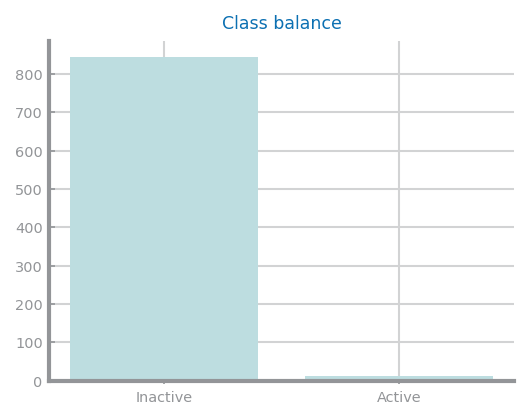

Minority class: 12
Majority class: 844
Proportion: 0.01 : 1


In [6]:
import matplotlib.pyplot as plt

unbal = pd.read_csv('data/unbalanced.csv', sep=',', decimal='.')
target_count = unbal['Outcome'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p>Before proceeding, lets split the dataset into two subdatasets: one for each class.
See, that for SMOTE method we have to split the original data into two: one with just one variable - the target column,
call it <code>y</code>, and another with all the other variables, call it <code>X</code> (look at the
<a href="Lab30_classification.ipynb">Classification</a> lab for more details about this).</p>

</div>
</div>
</div>

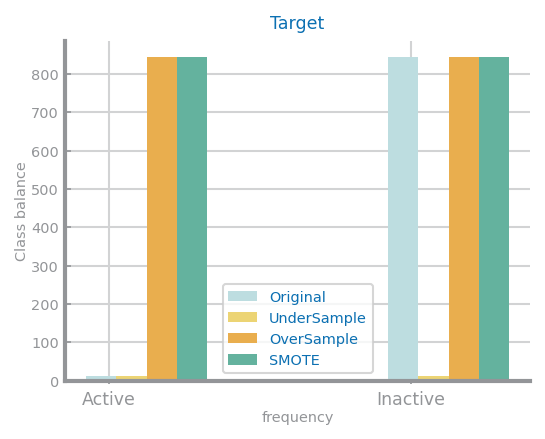

In [7]:
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = unbal[unbal['Outcome'] == min_class]
df_class_max = unbal[unbal['Outcome'] != min_class]

df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
y = unbal.pop('Outcome').values
X = unbal.values
smote_X, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='frequency', ylabel='Class balance')
plt.show()

<div class="cell border-box-sizing text_cell rendered"><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<h3 style="font-family:Arial;color:#6c6c6c;font-size:20px;font-style:italic;">Summary</h3><ul>
<li><p>Are there missing values? If yes, which is the best missing value imputation technique to apply?</p>
</li>
<li><p>Are there outliers? If yes, what are you going to do about them?</p>
</li>
<li><p>Are there symbolic variables, beside the class, that justify dummification?</p>
</li>
<li><p>Are all variables in the same scale? If not, how does scaling impact the  results?</p>
</li>
<li><p>Is the dataset unbalanced? If yes, what is the best balancing technique to apply?</p>
</li>
</ul>
</div>
</div>
</div>
    </div>
  </div>